In [2]:
from google.colab import files
uploaded = files.upload()

Saving churn.csv to churn.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

Churn  AccountWeeks  ContractRenewal  ...  MonthlyCharge  OverageFee  RoamMins
0      0           128                1  ...           89.0        9.87      10.0
1      0           107                1  ...           82.0        9.78      13.7
2      0           137                1  ...           52.0        6.06      12.2
3      0            84                0  ...           57.0        3.10       6.6
4      0            75                0  ...           41.0        7.42      10.1

[5 rows x 11 columns]

In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


Churn  AccountWeeks  ...   OverageFee     RoamMins
count  3333.000000   3333.000000  ...  3333.000000  3333.000000
mean      0.144914    101.064806  ...    10.051488    10.237294
std       0.352067     39.822106  ...     2.535712     2.791840
min       0.000000      1.000000  ...     0.000000     0.000000
25%       0.000000     74.000000  ...     8.330000     8.500000
50%       0.000000    101.000000  ...    10.070000    10.300000
75%       0.000000    127.000000  ...    11.770000    12.100000
max       1.000000    243.000000  ...    18.190000    20.000000

[8 rows x 11 columns]

In [13]:
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

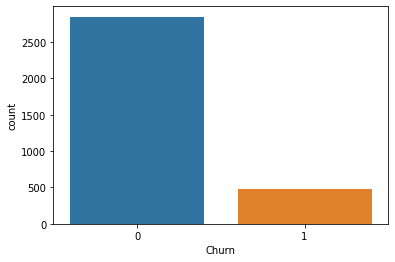

In [6]:
sns.countplot(x = data['Churn'], data= data )

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


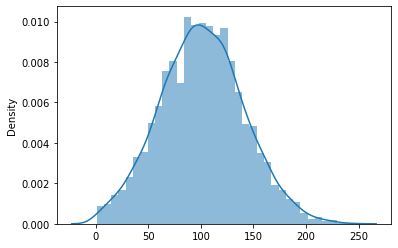

In [7]:
sns.distplot( x=data.AccountWeeks, kde= True, hist= True, hist_kws = {"alpha": 0.5})

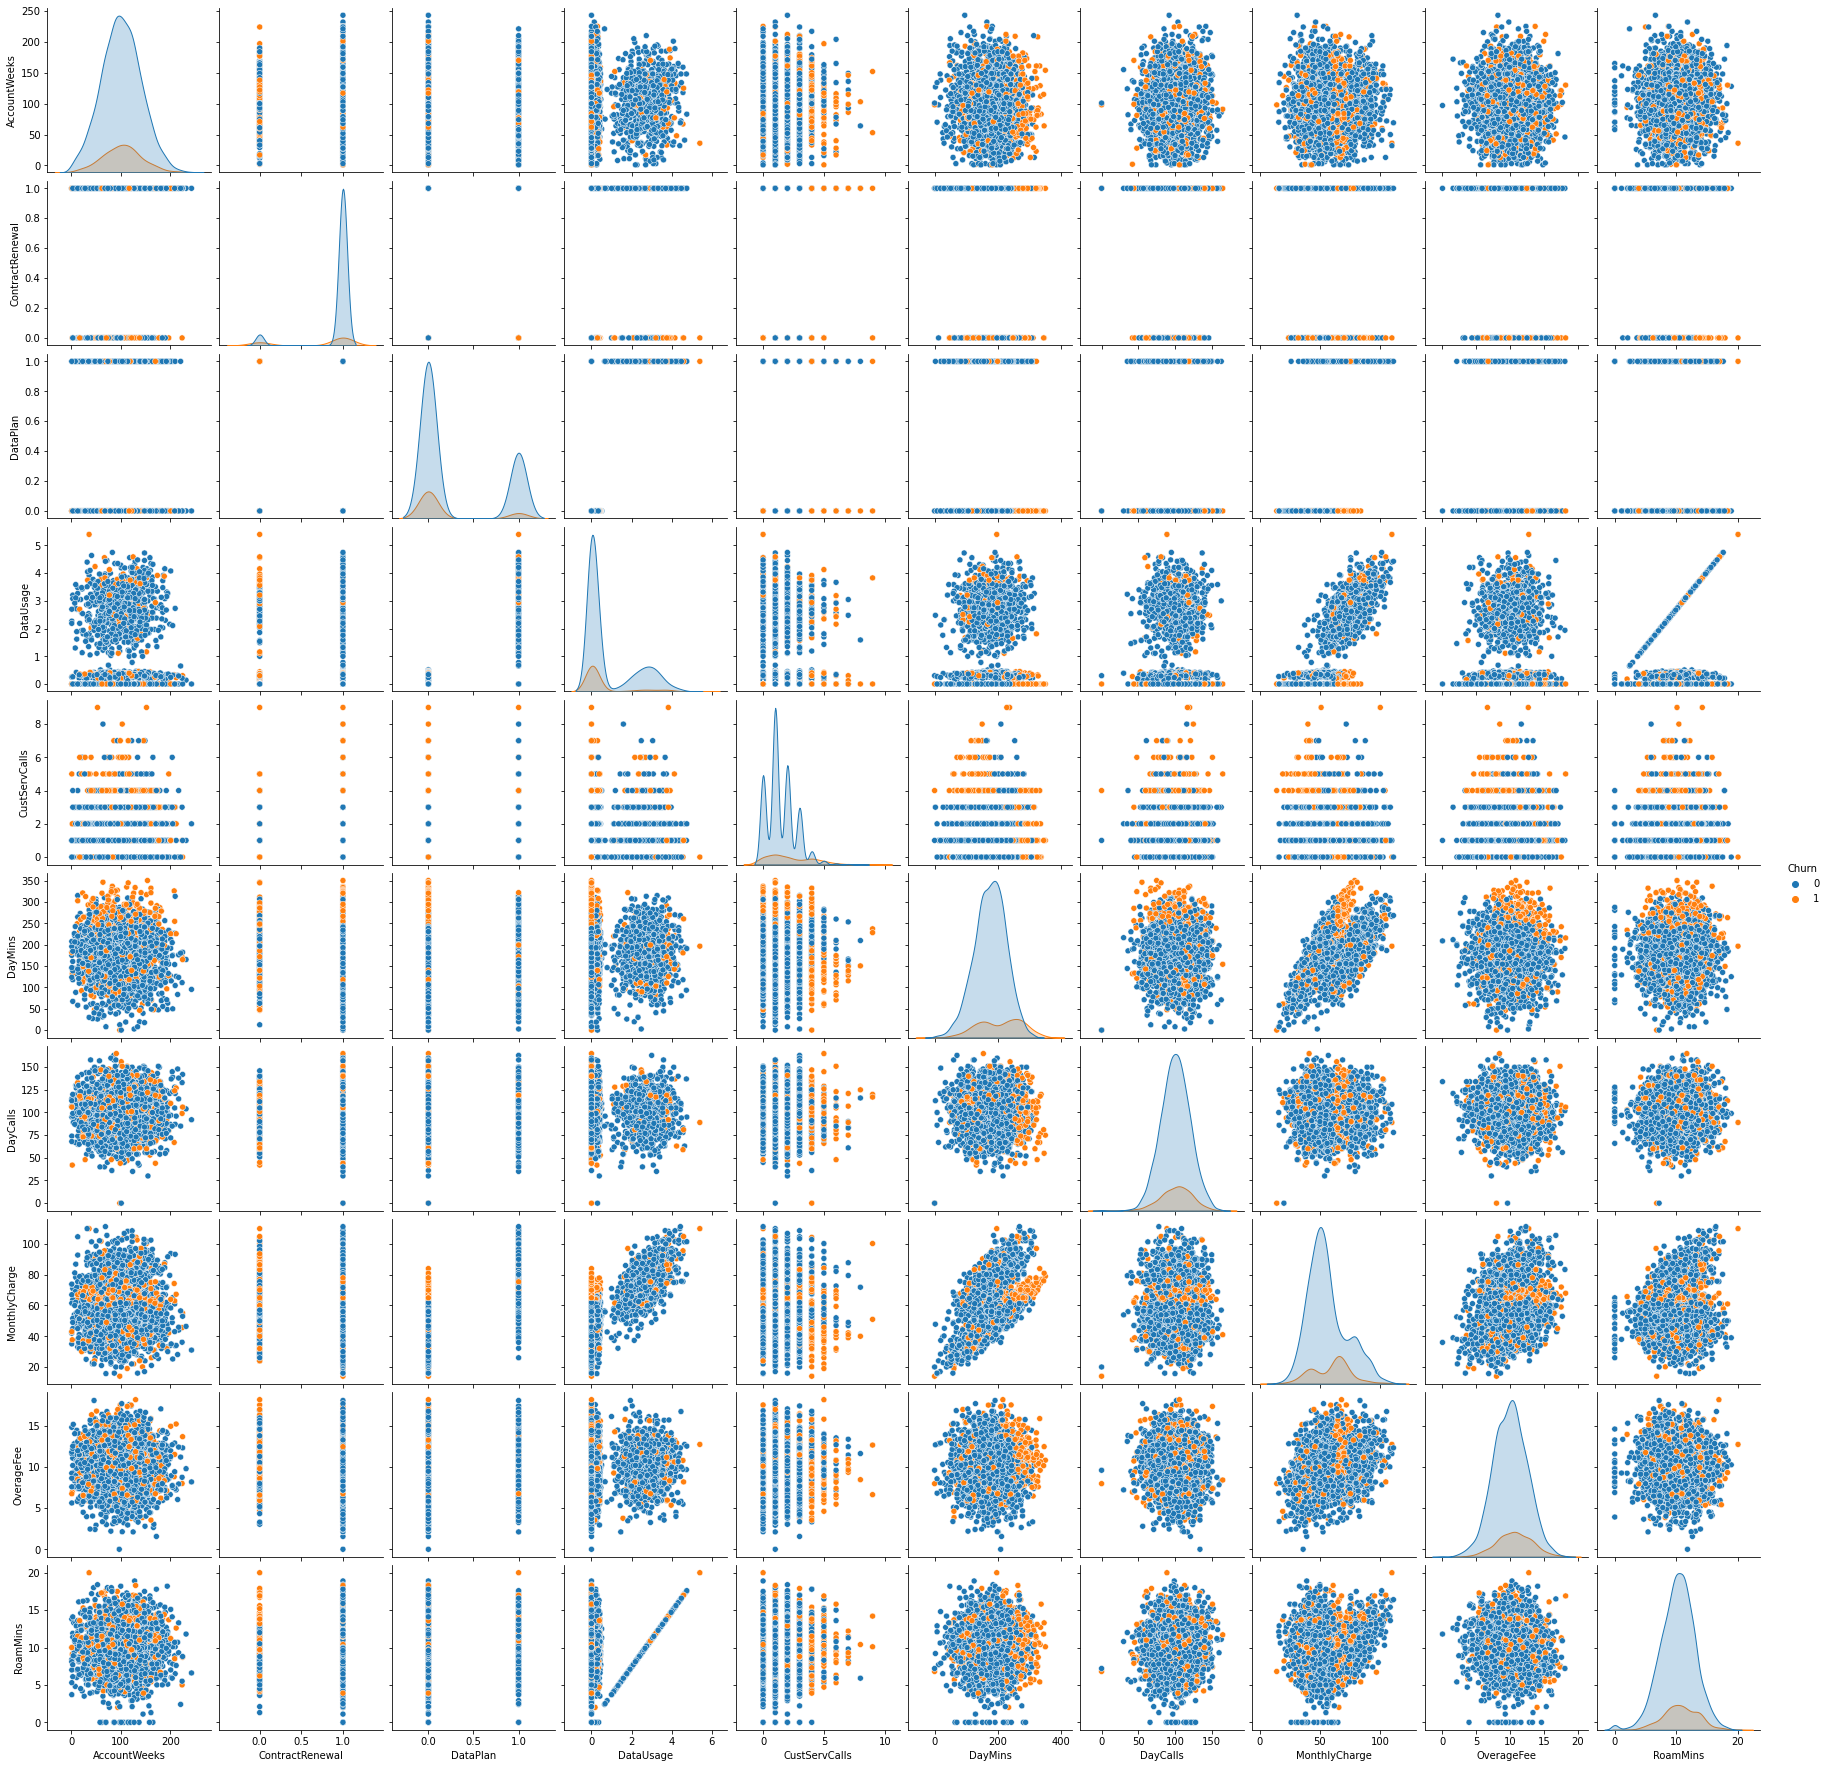

In [10]:
sns.pairplot(data=data, hue='Churn')

In [11]:
from scipy import stats
z = np.abs(stats.zscore(data))
z

array([[0.41167182, 0.67648946, 0.32758048, ..., 1.99072703, 0.0715836 ,
        0.08500823],
       [0.41167182, 0.14906505, 0.32758048, ..., 1.56451025, 0.10708191,
        1.24048169],
       [0.41167182, 0.9025285 , 0.32758048, ..., 0.26213309, 1.57434567,
        0.70312091],
       ...,
       [0.41167182, 1.83505538, 0.32758048, ..., 0.01858065, 1.73094204,
        1.3837779 ],
       [0.41167182, 2.08295458, 3.05268496, ..., 0.38390932, 0.81704825,
        1.87621082],
       [0.41167182, 0.67974475, 0.32758048, ..., 2.66049626, 1.28129669,
        1.24048169]])

In [12]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

414

In [20]:

n_data = data.drop(outliers,axis = 0).reset_index(drop = False)
display(n_data)


index  Churn  AccountWeeks  ...  MonthlyCharge  OverageFee  RoamMins
0         0      0           128  ...           89.0        9.87      10.0
1         1      0           107  ...           82.0        9.78      13.7
2         2      0           137  ...           52.0        6.06      12.2
3         6      0           121  ...           87.3       17.43       7.5
4         8      0           117  ...           63.9       17.58       8.7
...     ...    ...           ...  ...            ...         ...       ...
2914   3327      0            79  ...           40.0        9.49      11.8
2915   3328      0           192  ...           71.7       10.78       9.9
2916   3329      0            68  ...           56.4        7.67       9.6
2917   3330      0            28  ...           56.0       14.44      14.1
2918   3332      0            74  ...          100.0       13.30      13.7

[2919 rows x 12 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


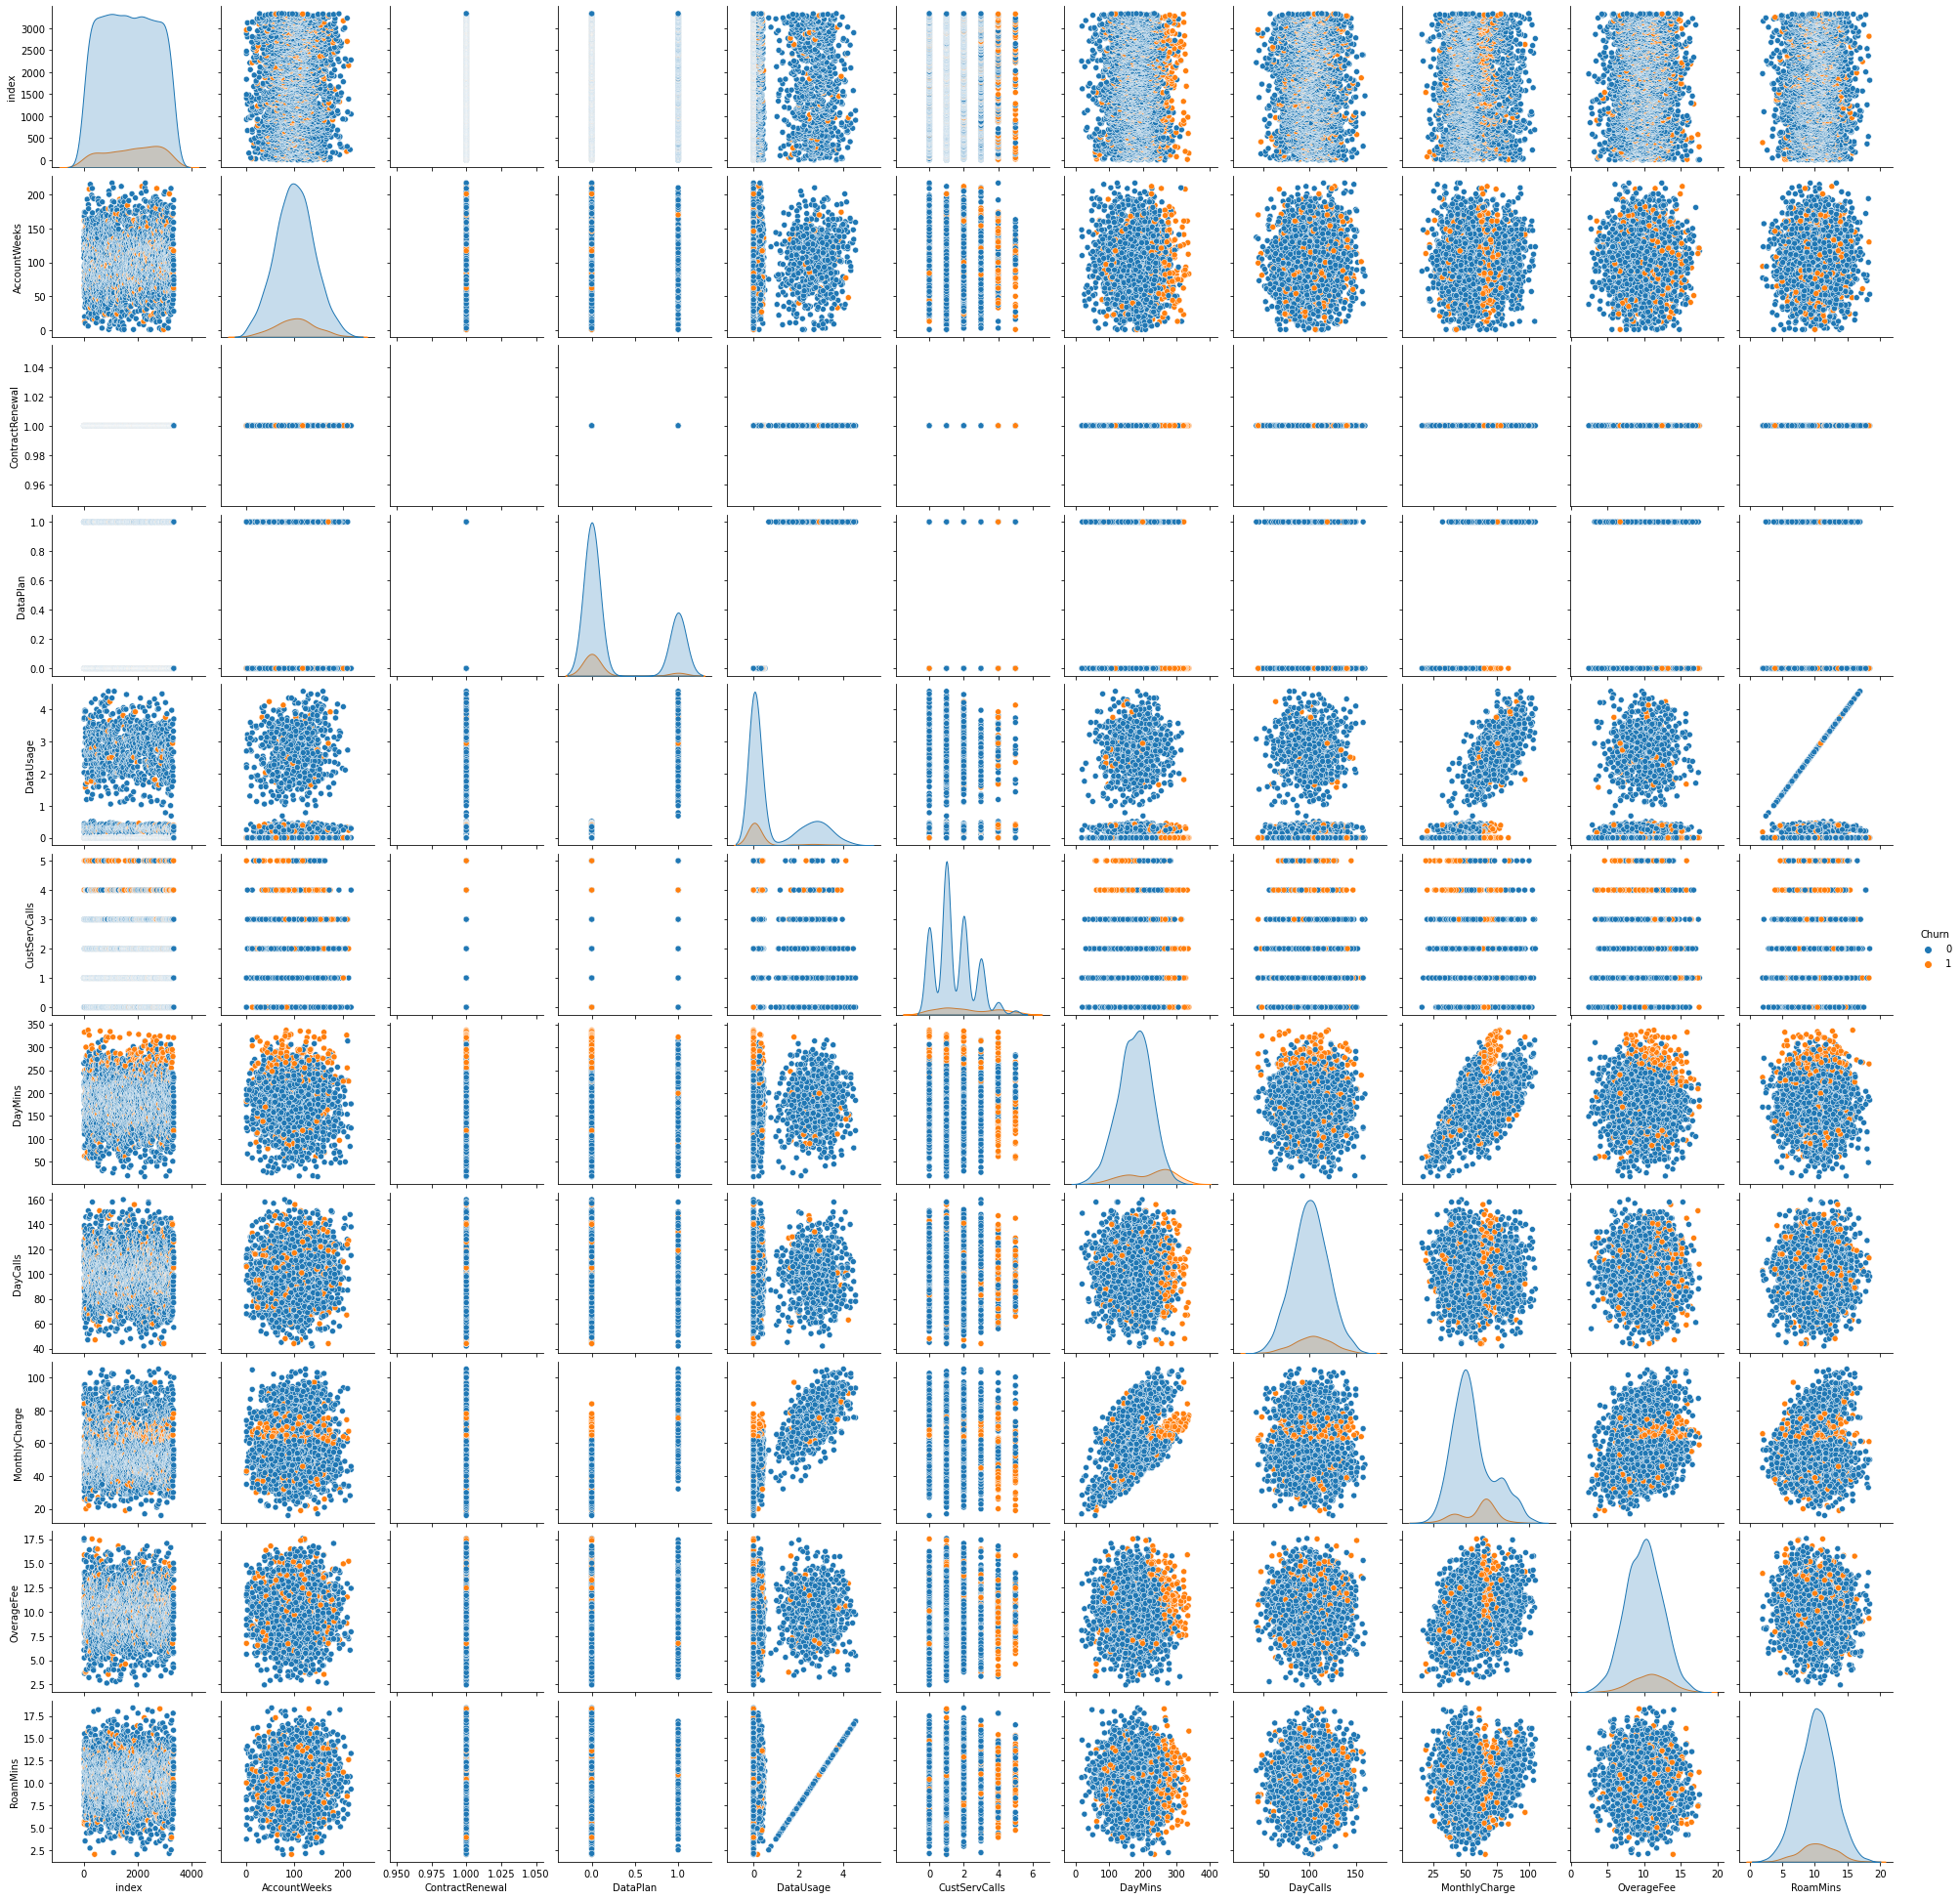

In [22]:
sns.pairplot(data=n_data, hue='Churn')

In [27]:
feat_counts = n_data.nunique(dropna=False)
feat_counts.sort_values()[:10]

ContractRenewal      1
Churn                2
DataPlan             2
CustServCalls        6
DayCalls           112
RoamMins           153
DataUsage          164
AccountWeeks       204
MonthlyCharge      588
OverageFee         975
dtype: int64

In [29]:
n_data.drop('ContractRenewal', axis=1)

index  Churn  AccountWeeks  ...  MonthlyCharge  OverageFee  RoamMins
0         0      0           128  ...           89.0        9.87      10.0
1         1      0           107  ...           82.0        9.78      13.7
2         2      0           137  ...           52.0        6.06      12.2
3         6      0           121  ...           87.3       17.43       7.5
4         8      0           117  ...           63.9       17.58       8.7
...     ...    ...           ...  ...            ...         ...       ...
2914   3327      0            79  ...           40.0        9.49      11.8
2915   3328      0           192  ...           71.7       10.78       9.9
2916   3329      0            68  ...           56.4        7.67       9.6
2917   3330      0            28  ...           56.0       14.44      14.1
2918   3332      0            74  ...          100.0       13.30      13.7

[2919 rows x 11 columns]

In [35]:
n_data.duplicated().sum()

0

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
n_data["Churn"].value_counts()


0    2598
1     321
Name: Churn, dtype: int64

In [41]:
X, y = data.iloc[: , 1:], data.iloc[: , 0]

In [42]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [46]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4 , random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9288469781397343
Accuracy of test: 0.92


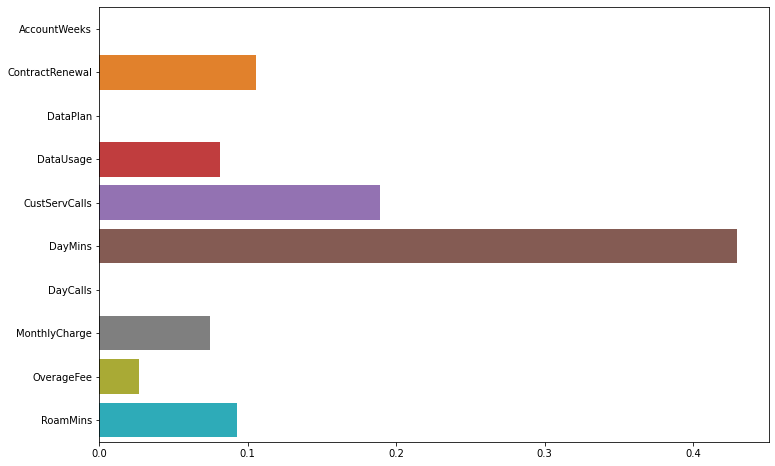

In [48]:

#Feature Importance
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [49]:
importance

array([0.        , 0.10588065, 0.        , 0.08122778, 0.18918125,
       0.42938885, 0.        , 0.07474012, 0.0268568 , 0.09272455])

In [50]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       866
           1       0.78      0.56      0.65       134

    accuracy                           0.92      1000
   macro avg       0.86      0.77      0.80      1000
weighted avg       0.91      0.92      0.91      1000



In [51]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.8579922566371682
Recall = 0.7677260349522594
Accuracy = 0.92
F1 Score = 0.8034880864652418


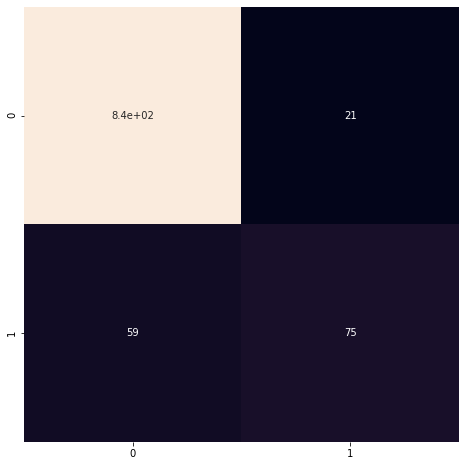

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.show()

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 0.67648946,  0.32758048,  1.6170861 , ...,  1.99072703,
        -0.0715836 , -0.08500823],
       [ 0.14906505,  0.32758048,  1.6170861 , ...,  1.56451025,
        -0.10708191,  1.24048169],
       [ 0.9025285 ,  0.32758048, -0.61839626, ..., -0.26213309,
        -1.57434567,  0.70312091],
       ...,
       [-1.83505538,  0.32758048, -0.61839626, ..., -0.01858065,
         1.73094204,  1.3837779 ],
       [ 2.08295458, -3.05268496, -0.61839626, ..., -0.38390932,
        -0.81704825, -1.87621082],
       [-0.67974475,  0.32758048,  1.6170861 , ...,  2.66049626,
         1.28129669,  1.24048169]])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

In [64]:
#Scaling and outlier removed

from sklearn.linear_model import LogisticRegression
models = LogisticRegression(random_state=42, n_jobs=-1)
models.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.8559794256322332
Accuracy of test: 0.856


In [68]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = models.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       857
           1       0.60      0.20      0.30       143

    accuracy                           0.87      1000
   macro avg       0.74      0.59      0.62      1000
weighted avg       0.84      0.87      0.84      1000



In [69]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.7422093837535013
Recall = 0.5903134205351241
Accuracy = 0.867
F1 Score = 0.6150718194947311


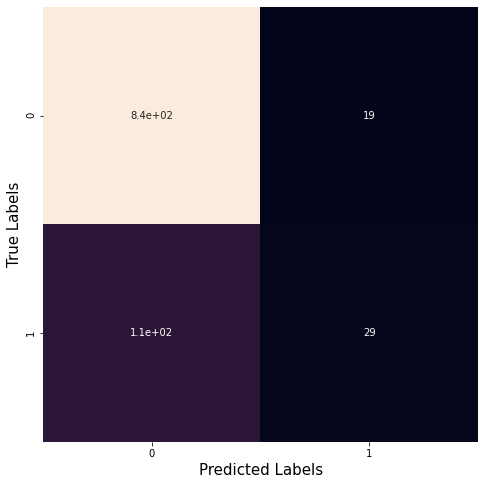

In [70]:

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [75]:
# the best performing model 
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
clf =   RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9901414487783969
Accuracy of test: 0.93


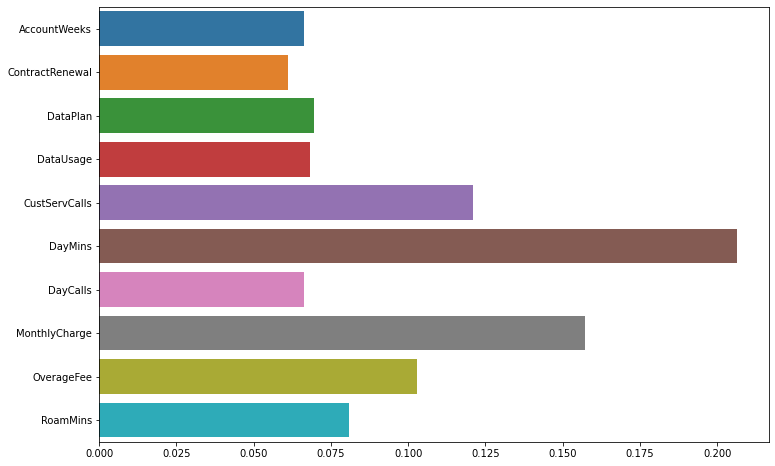

In [76]:
#Feature Importance
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [78]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       866
           1       0.80      0.63      0.71       134

    accuracy                           0.93      1000
   macro avg       0.87      0.81      0.83      1000
weighted avg       0.93      0.93      0.93      1000



In [79]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.8735384745261914
Recall = 0.8050394677880803
Accuracy = 0.93
F1 Score = 0.8342803030303031


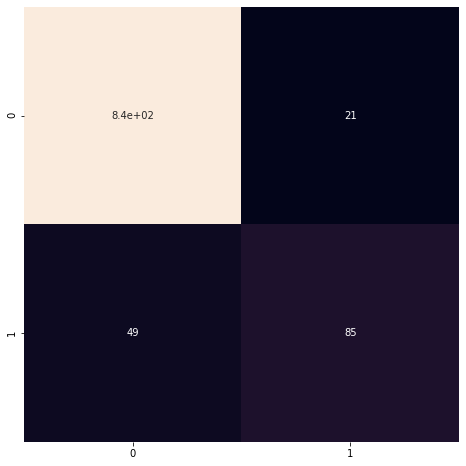

In [80]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.show()

Preprocessing
Are there any duplicated values? No
Do we need to do feature scaling? When using logistic regression i implement Feature scaling, but whwn dealing with the tree base algorithm it was unnecessary.
Do we need to generate new features? I didn't see any reason to generate a new feature. **bold text**

THE BSET PERFORMING MODEL IS THE RANDOM FOREST. THE REASON BEING THAT IT HAS A HIGHER ACCURACY COMPARED TO THE OTHER ALGORITHMS.

I SUGGEST TO GET A BETTER RESULT DO AN INDEPT EDA, HYPERPARAMETER TUNNING.
